# Ocean data handling

In this notebook we show how ocean data is handled.

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback
from os.path import join

import numpy as np
import iris
import iris.quickplot as qplt
import matplotlib
import matplotlib.pyplot as plt
from scmdata import ScmRun

from netcdf_scm.iris_cube_wrappers import CMIP6OutputCube

In [2]:
# make all logs apper
import logging

root_logger = logging.getLogger()
root_logger.addHandler(logging.StreamHandler())

In [3]:
plt.style.use("bmh")
%matplotlib inline

In [4]:
DATA_PATH_TEST = join("..", "..", "..", "tests", "test-data")
DATA_PATH_TEST_CMIP6_OUTPUT_ROOT = join(DATA_PATH_TEST, "cmip6output")

## Test data

For this notebook's test data we use CMIP6Output from NCAR's CESM2 model.

### 2D data

Some ocean data is 2D. Here we use surface downward heat flux in sea water.

Firstly we use data which has been regridded by the modelling group.

In [5]:
hfds_file = join(
    DATA_PATH_TEST,
    "cmip6output",
    "CMIP6",
    "CMIP",
    "NCAR",
    "CESM2",
    "historical",
    "r7i1p1f1",
    "Omon",
    "hfds",
    "gr",
    "v20190311",
    "hfds_Omon_CESM2_historical_r7i1p1f1_gr_195701-195703.nc",
)

We also examine how iris handles data which is provided on the native model grid.

In [6]:
hfds_file_gn = hfds_file.replace("gr", "gn")

### 3D data

Some ocean data is 3D. netCDF-SCM currently supports crunching this to iris cubes but will not convert those cubes to SCM timeseries. 

In [7]:
thetao_file = join(
    DATA_PATH_TEST,
    "cmip6output",
    "CMIP6",
    "CMIP",
    "NCAR",
    "CESM2",
    "historical",
    "r10i1p1f1",
    "Omon",
    "thetao",
    "gn",
    "v20190313",
    "thetao_Omon_CESM2_historical_r10i1p1f1_gn_195310-195312.nc",
)

## 2D data handling

In [8]:
# NBVAL_IGNORE_OUTPUT
hfds_cube = CMIP6OutputCube()
hfds_cube.load_data_from_path(hfds_file)

In [9]:
print(hfds_cube.cube)

surface_downward_heat_flux_in_sea_water / (W m-2) (time: 3; latitude: 180; longitude: 360)
     Dimension coordinates:
          time                                         x            -               -
          latitude                                     -            x               -
          longitude                                    -            -               x
     Cell Measures:
          cell_area                                    -            x               x
     Attributes:
          CDI: Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.7 CMIP-6.2
          activity_id: CMIP
          branch_method: standard
          branch_time_in_child: 674885.0
          branch_time_in_parent: 273750.0
          case_id: 21
          cesm_casename: b.e21.BHIST.f09_g17.CMIP6-historical.007
          comment: Model data on the 1x1 grid includes values in all c

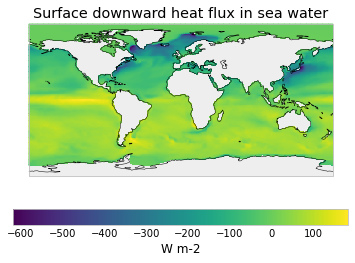

In [10]:
# NBVAL_IGNORE_OUTPUT
time_mean = hfds_cube.cube.collapsed("time", iris.analysis.MEAN)
qplt.pcolormesh(time_mean)
plt.gca().coastlines();

Iris' handling of data on the native model grid is mostly workable, but not yet perfect.

In [11]:
# NBVAL_IGNORE_OUTPUT
hfds_cube_gn = CMIP6OutputCube()
hfds_cube_gn.load_data_from_path(hfds_file_gn)

print(hfds_cube_gn.cube)

cannot be safely cast to variable data type


surface_downward_heat_flux_in_sea_water / (W m-2) (time: 3; -- : 384; -- : 320)
     Dimension coordinates:
          time                                         x       -         -
     Auxiliary coordinates:
          latitude                                     -       x         x
          longitude                                    -       x         x
     Cell Measures:
          cell_area                                    -       x         x
     Attributes:
          CDI: Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.7 CMIP-6.2
          activity_id: CMIP
          branch_method: standard
          branch_time_in_child: 674885.0
          branch_time_in_parent: 273750.0
          case_id: 21
          cesm_casename: b.e21.BHIST.f09_g17.CMIP6-historical.007
          comment: This is the net flux of heat entering the liquid water column through its...
 

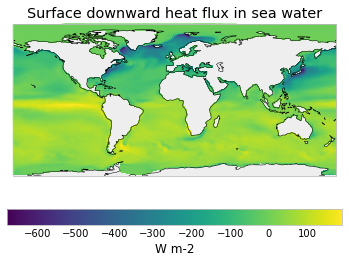

In [12]:
# NBVAL_IGNORE_OUTPUT
time_mean = hfds_cube_gn.cube.collapsed("time", iris.analysis.MEAN)
qplt.pcolormesh(time_mean)
plt.gca().coastlines();

## Getting SCM Timeseries

We cut down to SCM timeseries in the standard way.

Not calculating land fractions as all required cubes are not available
Performing lazy conversion to datetime for calendar: 365_day. This may cause subtle errors in operations that depend on the length of time between dates
cannot be safely cast to variable data type
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8

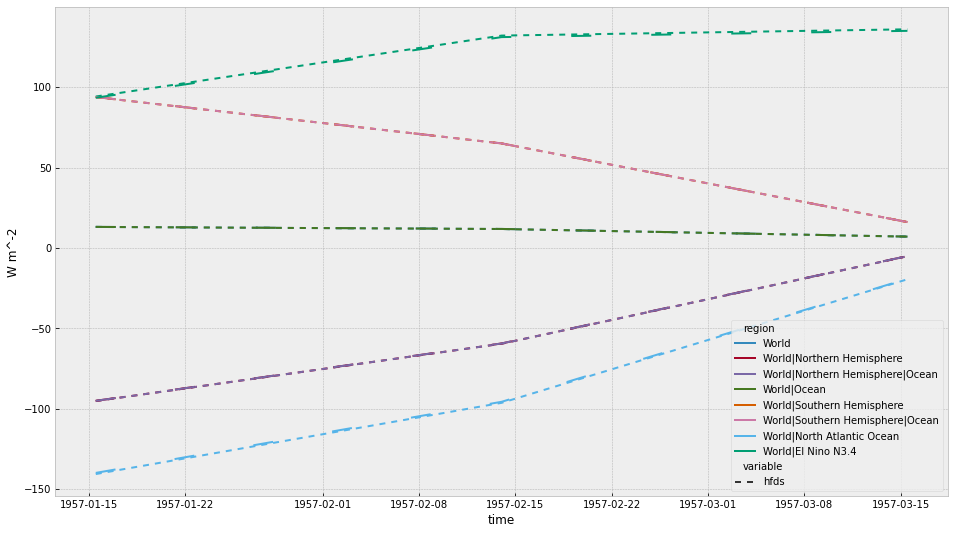

In [13]:
# NBVAL_IGNORE_OUTPUT
regions_to_get = [
    "World",
    "World|Northern Hemisphere",
    "World|Northern Hemisphere|Ocean",
    "World|Ocean",
    "World|Southern Hemisphere",
    "World|Southern Hemisphere|Ocean",
    "World|North Atlantic Ocean",
    "World|El Nino N3.4",
]
hfds_ts = hfds_cube.get_scm_timeseries(regions=regions_to_get)
hfds_gn_ts = hfds_cube_gn.get_scm_timeseries(regions=regions_to_get)

ax = plt.figure(figsize=(16, 9)).add_subplot(111)
ax = hfds_ts.lineplot(hue="region", style="variable", dashes=[(3, 3)], ax=ax)
hfds_gn_ts.lineplot(
    hue="region", style="variable", dashes=[(10, 30)], ax=ax, legend=False
);

Comparing the results of collapsing the native grid and the regridded data reveals a small difference (approx 1%), in particular in the small El Nino N3.4 region.

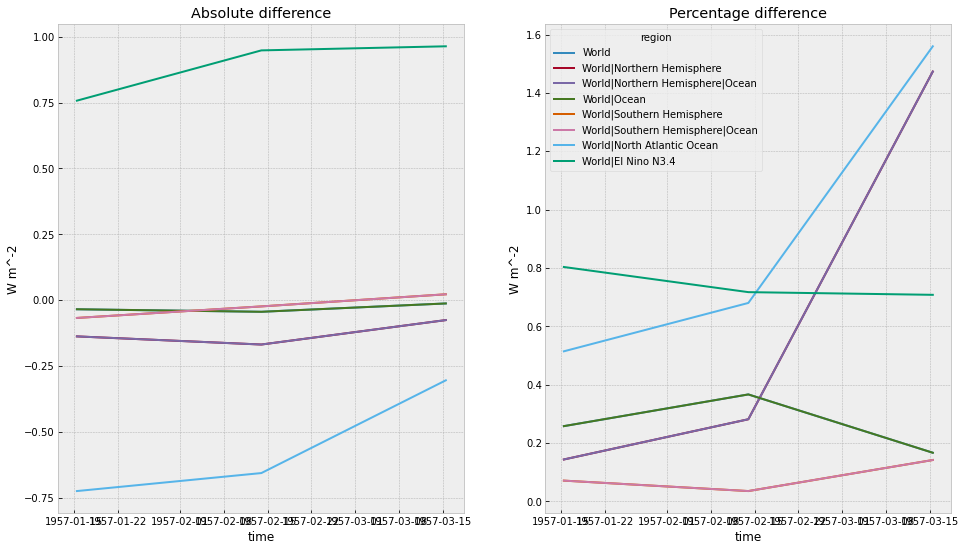

In [14]:
ax1, ax2 = plt.figure(figsize=(16, 9)).subplots(nrows=1, ncols=2)

ScmRun(hfds_ts.timeseries() - hfds_gn_ts.timeseries()).line_plot(
    hue="region", ax=ax1, legend=False
)
ax1.set_title("Absolute difference")

ScmRun(
    (
        (hfds_ts.timeseries() - hfds_gn_ts.timeseries()) / hfds_ts.timeseries()
    ).abs()
    * 100
).line_plot(hue="region", ax=ax2)
ax2.set_title("Percentage difference");

## 3D Data Handling

In [15]:
# NBVAL_IGNORE_OUTPUT
thetao_cube = CMIP6OutputCube()
thetao_cube.load_data_from_path(thetao_file)

cannot be safely cast to variable data type
Missing CF-netCDF measure variable 'volcello', referenced by netCDF variable 'thetao'


In [16]:
print(thetao_cube.cube)

sea_water_potential_temperature / (degC) (time: 3; generic: 60; -- : 384; -- : 320)
     Dimension coordinates:
          time                                x           -        -         -
          generic                             -           x        -         -
     Auxiliary coordinates:
          latitude                            -           -        x         x
          longitude                           -           -        x         x
     Cell Measures:
          cell_area                           -           -        x         x
     Attributes:
          CDI: Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.7 CMIP-6.2
          activity_id: CMIP
          branch_method: standard
          branch_time_in_child: 674885.0
          branch_time_in_parent: 306600.0
          case_id: 24
          cesm_casename: b.e21.BHIST.f09_g17.CMIP6-historical.01

If we take a time mean of a cube with 3D spatial data, we end up with a 3D cube, which cannot be plotted on a 2D plot.

In [17]:
# NBVAL_IGNORE_OUTPUT
time_mean = thetao_cube.cube.collapsed("time", iris.analysis.MEAN)
try:
    qplt.pcolormesh(time_mean,)
except ValueError as e:
    traceback.print_exc(limit=0, chain=False)

Traceback (most recent call last):
ValueError: Cube must be 2-dimensional. Got 3 dimensions.


If we take e.g. a depth mean too, then we can plot (although as this data is on the model's native grid iris doesn't do a great job of plotting it).

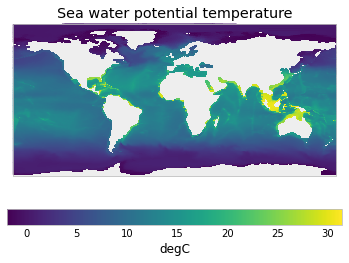

In [18]:
# NBVAL_IGNORE_OUTPUT
# the depth co-ordinate is labelled as 'generic' for some reason
time_depth_mean = time_mean.collapsed("generic", iris.analysis.MEAN)
qplt.pcolormesh(time_depth_mean);

We can crunch into SCM timeseries cubes.

In [19]:
# NBVAL_IGNORE_OUTPUT
thetao_ts_cubes = thetao_cube.get_scm_timeseries_cubes(regions=regions_to_get)

cannot be safely cast to variable data type
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/coords.py:1406: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/Users/znicholls/miniconda3/envs/netc

These cubes now have dimensions of time and depth (labelled as 'generic' here). Hence we can plot them.

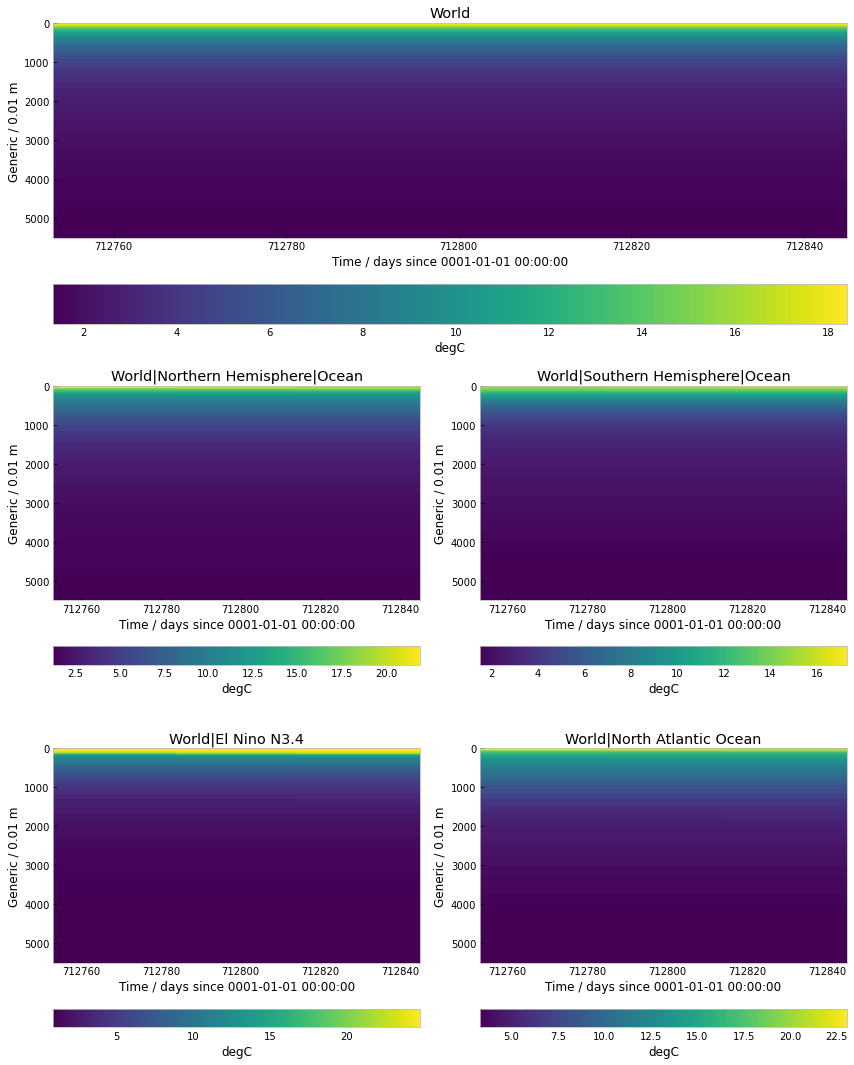

In [20]:
plt.figure(figsize=(12, 15))

plt.subplot(311)
qplt.pcolormesh(thetao_ts_cubes["World"].cube,)
plt.title("World")

plt.subplot(323)
qplt.pcolormesh(thetao_ts_cubes["World|Northern Hemisphere|Ocean"].cube,)
plt.title("World|Northern Hemisphere|Ocean")

plt.subplot(324)
qplt.pcolormesh(thetao_ts_cubes["World|Southern Hemisphere|Ocean"].cube,)
plt.title("World|Southern Hemisphere|Ocean")

plt.subplot(325)
qplt.pcolormesh(thetao_ts_cubes["World|El Nino N3.4"].cube,)
plt.title("World|El Nino N3.4")

plt.subplot(326)
qplt.pcolormesh(thetao_ts_cubes["World|North Atlantic Ocean"].cube,)
plt.title("World|North Atlantic Ocean")

plt.tight_layout()

We have also not yet decided on our convention for handling the depth information in `ScmRun`'s, hence attempting to retrieve SCM timeseries will result in an error.

In [21]:
# NBVAL_IGNORE_OUTPUT
try:
    thetao_cube.get_scm_timeseries(regions=regions_to_get)
except NotImplementedError as e:
    traceback.print_exc(limit=0, chain=False)

/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/coords.py:1406: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/coords.py:1406: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/site-packages/iris/fileformats/netcdf.py:395: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]
/Users/znicholls/miniconda3/envs/netcdf-scm/lib/python3.8/sit